# **IMPORT LIBRARY**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# **DATA**

## **Read Data**

In [ ]:
# Train data
train = pd.read_csv('train_sample.csv', sep=',')
train

,start_point,end_point,time_of_day,day_of_week,traffic_condition,event_count,is_holiday,vehicle_density,population_density,weather,public_transport_availability,historical_delay_factor,travel_time
0,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),day,Sunday,NaN,9,1,NaN,high,NaN,1,0.878909,26.907612
1,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),morning,Thursday,NaN,7,1,medium,high,NaN,1,1.081668,27.489129
2,Central Jakarta (Jakarta Pusat),East Jakarta (Jakarta Timur),morning,Thursday,NaN,7,0,medium,low,NaN,2,1.192379,27.228978
3,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),morning,Friday,10.0,9,0,medium,high,fog,1,0.833348,33.943970
4,Central Jakarta (Jakarta Pusat),West Jakarta (Jakarta Barat),day,Tuesday,NaN,7,0,medium,high,rain,2,0.966819,20.603115
...,...,...,...,...,...,...,...,...,...,...,...,...,...
39995,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),evening,Saturday,7.0,7,0,NaN,medium,clear,1,0.819783,55.939329
39996,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),morning,Friday,9.0,7,1,medium,NaN,fog,1,0.914077,55.668274
39997,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),evening,Friday,5.0,7,0,low,low,fog,1,0.943298,60.548584
39998,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),day,Thursday,10.0,9,1,NaN,NaN,rain,1,1.185288,23.996753


In [ ]:
test = pd.read_csv('test_sample.csv', sep=',')
test

,start_point,end_point,time_of_day,day_of_week,traffic_condition,event_count,is_holiday,vehicle_density,population_density,weather,public_transport_availability,historical_delay_factor
0,West Jakarta (Jakarta Barat),East Jakarta (Jakarta Timur),morning,Saturday,5.0,8,1,medium,NaN,NaN,2,1.126429
1,South Jakarta (Jakarta Selatan),East Jakarta (Jakarta Timur),evening,Saturday,NaN,9,1,low,medium,fog,2,1.121015
2,Central Jakarta (Jakarta Pusat),South Jakarta (Jakarta Selatan),morning,Friday,9.0,8,0,high,NaN,rain,1,1.109638
3,West Jakarta (Jakarta Barat),South Jakarta (Jakarta Selatan),night,Wednesday,5.0,8,1,low,NaN,storm,1,0.842474
4,Central Jakarta (Jakarta Pusat),North Jakarta (Jakarta Utara),morning,Tuesday,NaN,9,1,high,NaN,rain,2,0.775742
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,North Jakarta (Jakarta Utara),South Jakarta (Jakarta Selatan),night,Saturday,NaN,7,1,low,low,storm,1,1.125863
2996,Central Jakarta (Jakarta Pusat),East Jakarta (Jakarta Timur),day,Monday,NaN,9,1,high,medium,NaN,2,0.941115
2997,South Jakarta (Jakarta Selatan),East Jakarta (Jakarta Timur),day,Saturday,5.0,9,1,medium,high,fog,2,0.973585
2998,North Jakarta (Jakarta Utara),West Jakarta (Jakarta Barat),day,Tuesday,NaN,7,0,low,medium,clear,0,0.815122


## **Data Information**

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   start_point                    40000 non-null  object 
 1   end_point                      40000 non-null  object 
 2   time_of_day                    40000 non-null  object 
 3   day_of_week                    40000 non-null  object 
 4   traffic_condition              25599 non-null  float64
 5   event_count                    40000 non-null  int64  
 6   is_holiday                     40000 non-null  int64  
 7   vehicle_density                25622 non-null  object 
 8   population_density             25552 non-null  object 
 9   weather                        25571 non-null  object 
 10  public_transport_availability  40000 non-null  int64  
 11  historical_delay_factor        40000 non-null  float64
 12  travel_time                    40000 non-null 

Berdasarkan output, terdapat 4 kolom dengan data yang hilang.

- traffic_condition (25599/40000)
- vehicle_density (25622/40000)
- population_density (25552/40000)
- weather (25571/40000)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   start_point                    3000 non-null   object 
 1   end_point                      3000 non-null   object 
 2   time_of_day                    3000 non-null   object 
 3   day_of_week                    3000 non-null   object 
 4   traffic_condition              2400 non-null   float64
 5   event_count                    3000 non-null   int64  
 6   is_holiday                     3000 non-null   int64  
 7   vehicle_density                2400 non-null   object 
 8   population_density             2400 non-null   object 
 9   weather                        2400 non-null   object 
 10  public_transport_availability  3000 non-null   int64  
 11  historical_delay_factor        3000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage:

Berdasarkan output, terdapat 4 kolom dengan data yang hilang.

- traffic_condition (2400/3000)
- vehicle_density  (2400/3000)
- population_density  (2400/3000)
- weather  (2400/3000)

# **DATA PREPARATION**

## **Missing Values**

Melakukan penanganan data yang hilang pada kolom "traffic_condition" menggunakan teknik imputasi median.

In [ ]:
# Imputation "trafic_condition" for train and test
median_tc = train['traffic_condition'].median()

train['traffic_condition'].fillna(median_tc, inplace=True)
test['traffic_condition'].fillna(median_tc, inplace=True)

/tmp/ipython-input-6-3117268266.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['traffic_condition'].fillna(median_tc, inplace=True)
/tmp/ipython-input-6-3117268266.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Melakukan penanganan data yang hilang pada kolom-kolom kategorik menggunakan teknik imputasi modus.

In [ ]:
# Imputation "vehicle_density", "population_density", "weather" for train and test
col = ['vehicle_density', 'population_density', 'weather']

for i in col:
  mode = train[i].mode()[0]
  train[i].fillna(mode, inplace=True)
  test[i].fillna(mode, inplace=True)

/tmp/ipython-input-7-554548138.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[i].fillna(mode, inplace=True)
/tmp/ipython-input-7-554548138.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.met

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   start_point                    40000 non-null  object 
 1   end_point                      40000 non-null  object 
 2   time_of_day                    40000 non-null  object 
 3   day_of_week                    40000 non-null  object 
 4   traffic_condition              40000 non-null  float64
 5   event_count                    40000 non-null  int64  
 6   is_holiday                     40000 non-null  int64  
 7   vehicle_density                40000 non-null  object 
 8   population_density             40000 non-null  object 
 9   weather                        40000 non-null  object 
 10  public_transport_availability  40000 non-null  int64  
 11  historical_delay_factor        40000 non-null  float64
 12  travel_time                    40000 non-null 

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   start_point                    3000 non-null   object 
 1   end_point                      3000 non-null   object 
 2   time_of_day                    3000 non-null   object 
 3   day_of_week                    3000 non-null   object 
 4   traffic_condition              3000 non-null   float64
 5   event_count                    3000 non-null   int64  
 6   is_holiday                     3000 non-null   int64  
 7   vehicle_density                3000 non-null   object 
 8   population_density             3000 non-null   object 
 9   weather                        3000 non-null   object 
 10  public_transport_availability  3000 non-null   int64  
 11  historical_delay_factor        3000 non-null   float64
dtypes: float64(2), int64(3), object(7)
memory usage:

## **Cleaning Data**

In [ ]:
import re

Melakukan pembersihan data untuk mengekstrak isi dalam tanda kurung () pada kolom "start_point" dan "end_point".

In [ ]:
# Def function for extraction
def extract_inside_parentheses(text):
    match = re.search(r'\((.*?)\)', str(text))
    return match.group(1) if match else text  # fallback to the real text

# Apply function
train['start_point'] = train['start_point'].apply(extract_inside_parentheses)
train['end_point'] = train['end_point'].apply(extract_inside_parentheses)

# Apply function
test['start_point'] = test['start_point'].apply(extract_inside_parentheses)
test['end_point'] = test['end_point'].apply(extract_inside_parentheses)

# **EXPLORATORY DATA ANALYSIS**

## **Descriptive Statistics**

Menampilkan statistik 5 serangkai untuk melihat gambaran awal data yang bertipe numerik.

In [ ]:
train.describe()

,traffic_condition,event_count,is_holiday,public_transport_availability,historical_delay_factor,travel_time
count,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,8.651775,8.704900,0.500975,1.499525,1.009510,30.405411
std,1.486933,5.374108,0.500005,0.671201,0.162034,15.074854
min,3.000000,7.000000,0.000000,0.000000,0.750009,2.490207
25%,9.000000,7.000000,0.000000,1.000000,0.878415,18.685606
50%,9.000000,8.000000,1.000000,2.000000,1.003418,26.604213
75%,9.000000,9.000000,1.000000,2.000000,1.132044,39.771383
max,10.000000,88.000000,1.000000,2.000000,2.701010,218.832465


## **Correlation**

Menampilkan plot korelasi pearson pada variabel prediktor yang bertipe numerik terhadap variabel respon untuk melihat hubungan antar variabel.

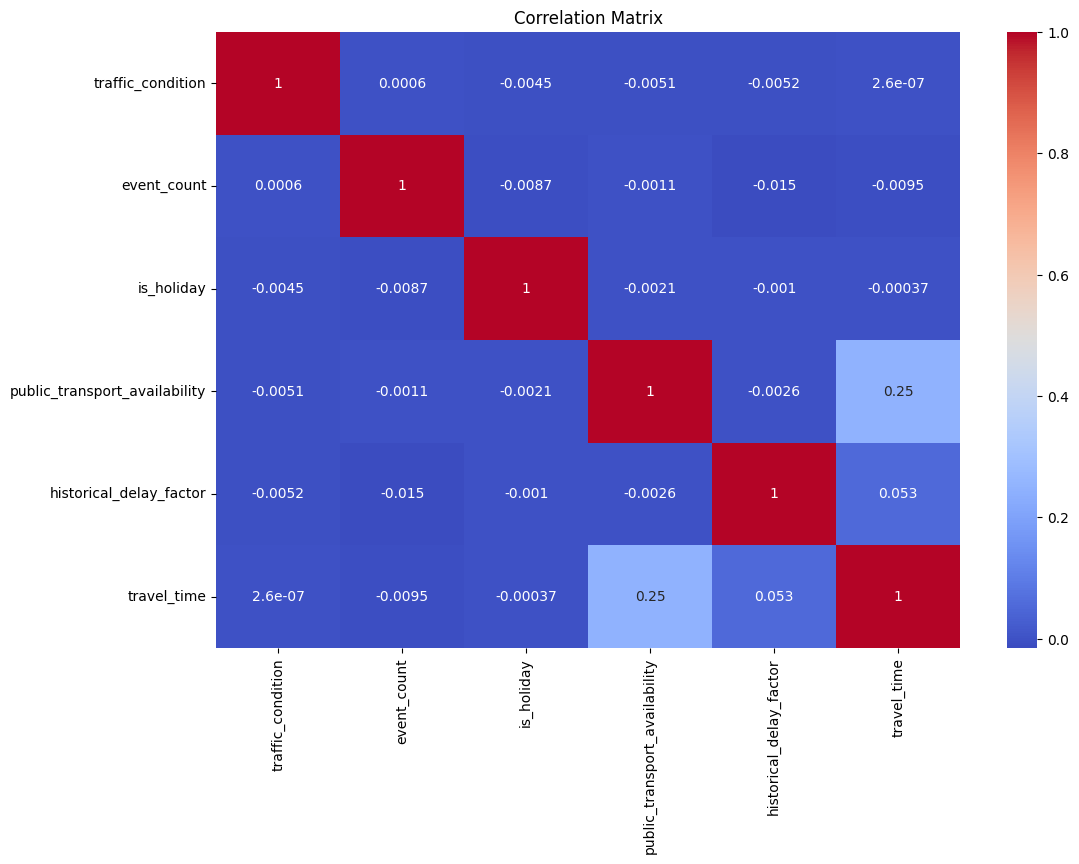

In [ ]:
# Num cols
num_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Corr plot
plt.figure(figsize=(12, 8))
sns.heatmap(train[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Melakukan uji signifikansi menggunakan statistik uji T untuk mengetahui signifikansi hubungan antara variabel prediktor dan respon. Tujuannya untuk membantu menentukan variabel mana yang penting untuk prediksi.

In [ ]:
num_cols = train.select_dtypes(include=['int64', 'float64']).columns

# T test
for i in num_cols:
    t_stat, p_val = ttest_ind(train[i], train['travel_time'], equal_var=False)
    print(f"{i}: t-statistic = {t_stat:.5f}, p-value = {p_val:.5f}")

traffic_condition: t-statistic = -287.21445, p-value = 0.00000
event_count: t-statistic = -271.18634, p-value = 0.00000
is_holiday: t-statistic = -396.52789, p-value = 0.00000
public_transport_availability: t-statistic = -383.11849, p-value = 0.00000
historical_delay_factor: t-statistic = -389.97662, p-value = 0.00000
travel_time: t-statistic = 0.00000, p-value = 1.00000


Berdasarkan output di atas, keseluruhan variabel prediktor berpengaruh signifikan terhadap respon. Artinya, kenaikkan/penurunan suatu variabel prediktor akan menaikkan/menurunkan variabel respon.

In [ ]:
from scipy.stats import chi2_contingency

Mengevaluasi hubungan antara variabel-variabel kategorikal terhadap variabel respon menggunakan statistik uji Chi-Square. Tujuannya untuk membantu menentukan variabel mana yang penting untuk prediksi.

In [ ]:
# Copy data train
train_copy = train.copy()

# Discretization target
train_copy['travel_time'] = pd.qcut(train['travel_time'], q=3, labels=['low', 'medium', 'high'])

# Categorical col
cat_cols = train.select_dtypes(include=['object']).columns

# P-value
for i in cat_cols:
    contingency_table = pd.crosstab(train[i], train['travel_time'])
    _, p, _, _ = chi2_contingency(contingency_table)
    print(f"{i}: p-value = {p:.5f}")

start_point: p-value = 0.49701
end_point: p-value = 0.49701
time_of_day: p-value = 0.49701
day_of_week: p-value = 0.49616
vehicle_density: p-value = 0.49734
population_density: p-value = 0.49734
weather: p-value = 0.49701


Berdasarkan output di atas, nilai-p keseluruhan variabel-variabel kategorik lebih kecil daripada batas signifikansi (5%). Artinya keseluruhan variabel prediktor berpengaruh signifikan terhadap respon.

## **Distributions**

Melihat distribusi data secara grafis/ilustratif menggunakan box-plot untuk mengetahui perbedaan rata-rata tiap "time_travel" di setiap kategori.

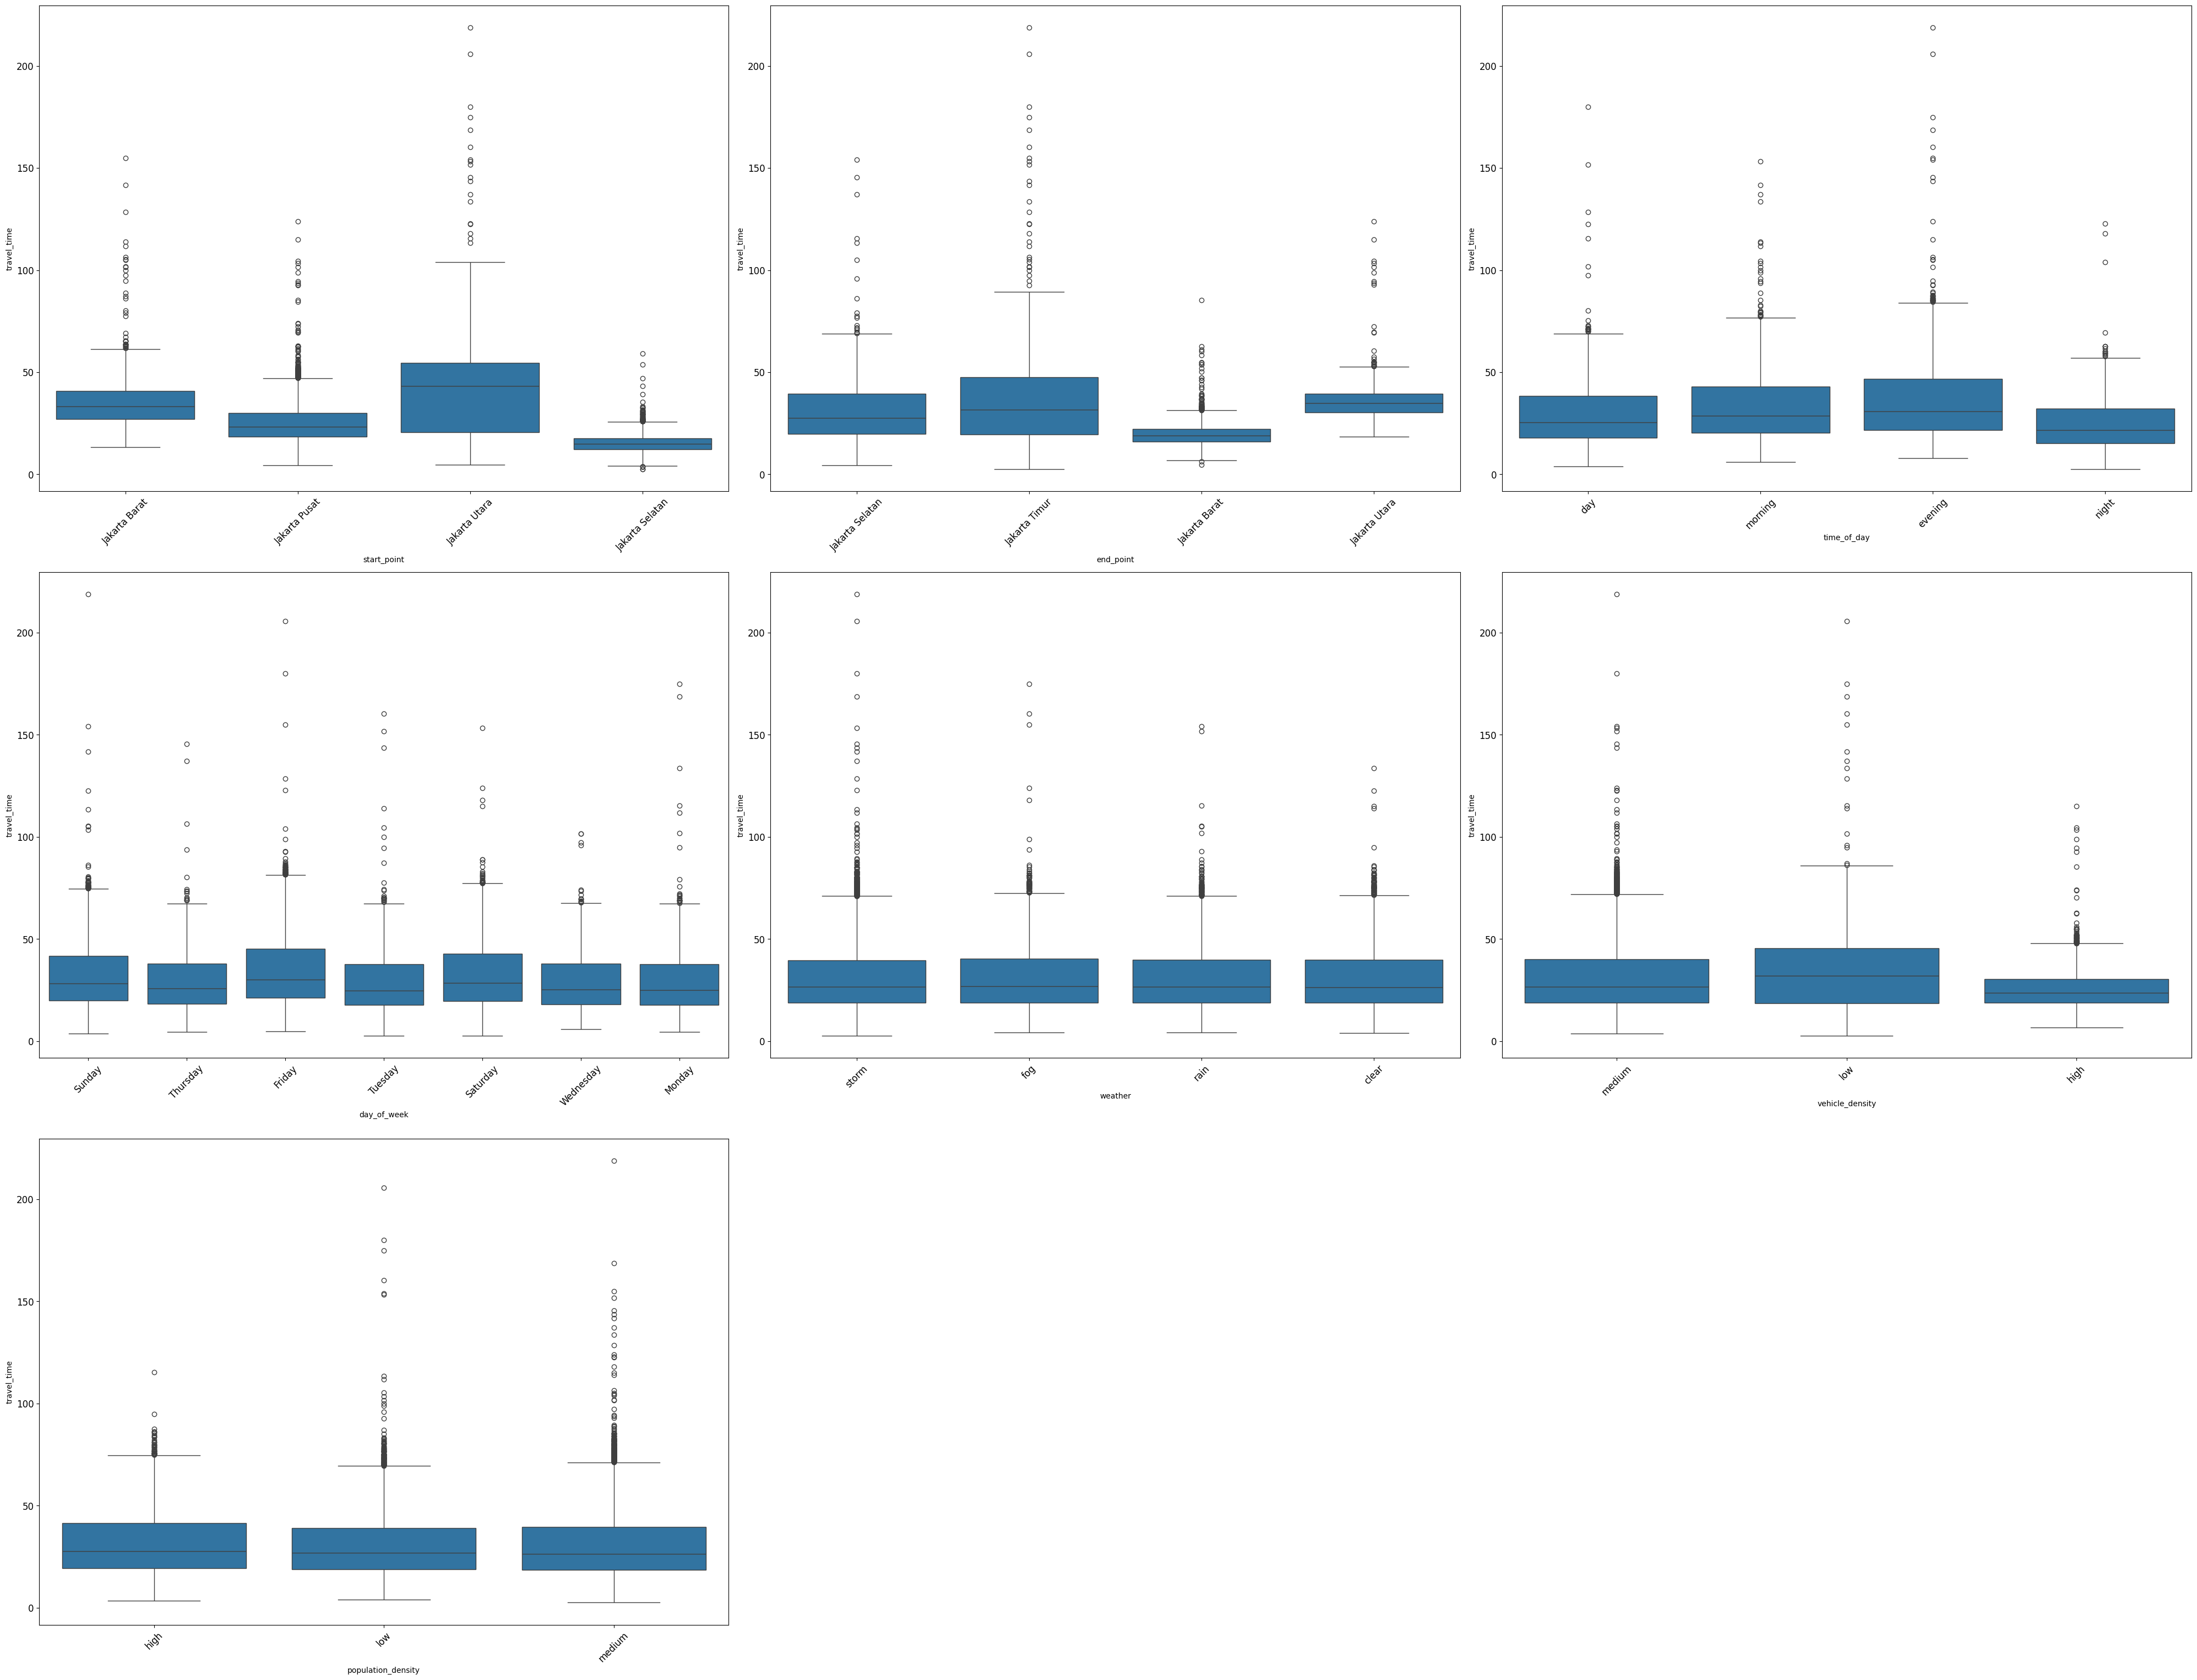

In [ ]:
cat_cols = [
    'start_point',
    'end_point',
    'time_of_day',
    'day_of_week',
    'weather',
    'vehicle_density',
    'population_density'
]

# Boxplot for each cat cols vs travel time
plt.figure(figsize=(40, 40))
for i, col in enumerate(cat_cols):
    plt.subplot(4, 3, i+1)
    sns.boxplot(x=col, y='travel_time', data=train)
    plt.xlabel(col)
    plt.ylabel('travel_time')
    plt.xticks(rotation=45)
    plt.xticks(rotation=45, fontsize=12)
    plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

## **Outlier Detection**

Pemeriksaan outlier pada variabel respon menggunakan box-plot.

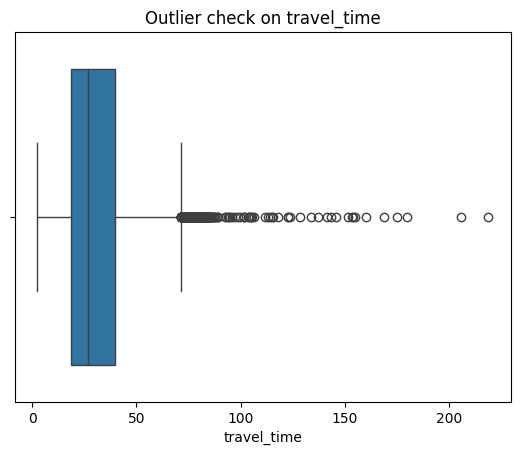

In [ ]:
sns.boxplot(x=train['travel_time'])
plt.title("Outlier check on travel_time")
plt.show()

In [ ]:
# Calculate Q1, 13
Q1 = train['travel_time'].quantile(0.25)
Q3 = train['travel_time'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# LB and UB
LB = Q1 - 1.5 * IQR
UB = Q3 + 1.5 * IQR
print(f"Lower Bound: {LB}")
print(f"Upper Bound: {UB}")

Lower Bound: -12.94305858830737
Upper Bound: 71.40004742531329


In [ ]:
# Detect sum and percentage outlier
outlier_sum = train[(train['travel_time'] < LB) | (train['travel_time'] > UB)].shape[0]
outlier_percentage = outlier_sum / train.shape[0] * 100
print(f"Number of outlier: {outlier_sum}")
print(f"Percentage of outlier: {outlier_percentage:.2f}%")

Number of outlier: 465
Percentage of outlier: 1.16%


In [ ]:
# copy data
train_copy = train.copy()

train_copy['travel_time'] = np.log1p(train_copy['travel_time'])

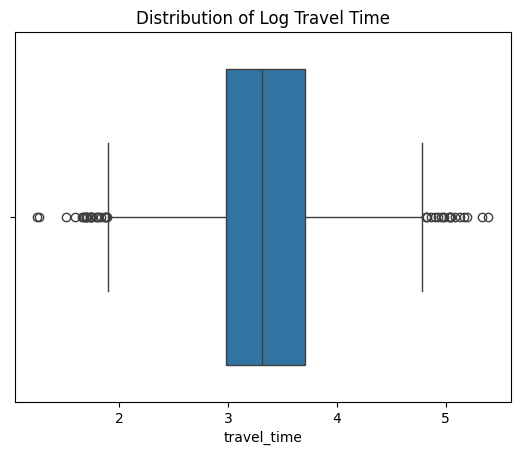

In [ ]:
sns.boxplot(x=train_copy['travel_time'])
plt.title("Distribution of Log Travel Time")
plt.show()

## **Hypothesis Testing**

In [ ]:
import scipy.stats as stats

In [ ]:
cat_cols = train.select_dtypes(include=['object']).columns

In [ ]:
# ONE WAY ANOVA
for i in cat_cols:
    group_means = train.groupby(i)['travel_time'].mean()
    f_statistic, p_value = stats.f_oneway(*[group['travel_time'] for _, group in train.groupby(i)])
    print(f"{i}: f-statistic = {f_statistic:.5f}, p-value = {p_value:.5f}")

start_point: f-statistic = 5707.24913, p-value = 0.00000
end_point: f-statistic = 2509.61945, p-value = 0.00000
time_of_day: f-statistic = 1128.24915, p-value = 0.00000
day_of_week: f-statistic = 139.06924, p-value = 0.00000
vehicle_density: f-statistic = 485.86024, p-value = 0.00000
population_density: f-statistic = 12.29086, p-value = 0.00000
weather: f-statistic = 0.76484, p-value = 0.51358


## **Post-Hoc Test**

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [ ]:
cat_sig_cols = [
    'start_point',
    'end_point',
    'time_of_day',
    'day_of_week',
    'vehicle_density',
    'population_density'
]

# Tukey test
for i in cat_sig_cols:
  print(f"Results for {i}:")
  tukey_result = pairwise_tukeyhsd(endog=train['travel_time'], groups=train[i], alpha=0.05)
  print(tukey_result.summary())

Results for start_point:
          Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj  lower    upper   reject
-----------------------------------------------------------------------
  Jakarta Barat   Jakarta Pusat  -9.6093   0.0  -10.053  -9.1655   True
  Jakarta Barat Jakarta Selatan -19.2871   0.0 -19.9144 -18.6598   True
  Jakarta Barat   Jakarta Utara   5.8436   0.0   5.3745   6.3127   True
  Jakarta Pusat Jakarta Selatan  -9.6778   0.0 -10.2496  -9.1061   True
  Jakarta Pusat   Jakarta Utara  15.4528   0.0  15.0611  15.8446   True
Jakarta Selatan   Jakarta Utara  25.1307   0.0   24.539  25.7223   True
-----------------------------------------------------------------------
Results for end_point:
         Multiple Comparison of Means - Tukey HSD, FWER=0.05          
     group1          group2     meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------
  Jakarta Barat Jak

# **DATA PREPROCESSING**

## **Split Data**

In [ ]:
X = train.drop(['travel_time'], axis=1)
y = np.log1p(train['travel_time'])

In [ ]:
# Train test split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_val: {X_val.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_val: {y_val.shape}")

Shape of X_train: (32000, 12)
Shape of X_val: (8000, 12)
Shape of y_train: (32000,)
Shape of y_val: (8000,)


## **Label Encoder and Normalization**

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
num_cols = [
    'traffic_condition',
    'event_count',
    'historical_delay_factor'
]

cat_cols = [
    'start_point',
    'end_point',
    'time_of_day',
    'day_of_week',
    'vehicle_density',
    'population_density',
    'weather'
]

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_cols),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
])

# **MODELLING**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

## **Linear Regression**

In [ ]:
# Define pipeline
lr_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', LinearRegression())
])

# Define params
lr_params = {
    'model__fit_intercept': [True, False]
}

# Grid search
lr_grid = GridSearchCV(lr_pipeline, lr_params, cv=5, scoring='r2')
lr_grid.fit(X_train, y_train)
print("Best Parameters: ", lr_grid.best_params_)
print("Best Score: ", lr_grid.best_score_)

# Best model
lr_best_model = lr_grid.best_estimator_

# R2
y_pred_lr_log = lr_best_model.predict(X_val)
y_pred_lr = np.expm1(y_pred_lr_log)
print("R2 Score: ", r2_score(np.expm1(y_val), y_pred_lr))

Best Parameters:  {'model__fit_intercept': True}
Best Score:  0.7541207000385848
R2 Score:  0.8054364840211632


## **Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Define pipeline
ridge_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', Ridge()),
])

# Define params
ridge_params = {
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'model__fit_intercept': [True, False],
    'model__solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    'model__max_iter': [100, 200],
    'model__tol': [1e-4]
}

# Grid search
ridge_grid = GridSearchCV(ridge_pipeline, ridge_params, cv=5, scoring='r2', n_jobs=-1)
ridge_grid.fit(X_train, y_train)
print("Best Parameters: ", ridge_grid.best_params_)
print("Best Score: ", ridge_grid.best_score_)

# Best model
ridge_best_model = ridge_grid.best_estimator_

# R2
y_pred_rr_log = ridge_best_model.predict(X_val)
y_pred_rr = np.expm1(y_pred_rr_log)
print("R2 Score: ", r2_score(np.expm1(y_val), y_pred_rr))

Best Parameters:  {'model__alpha': 1, 'model__fit_intercept': True, 'model__max_iter': 200, 'model__solver': 'sag', 'model__tol': 0.0001}
Best Score:  0.7541221162336667
R2 Score:  0.8053635457913921


## **Lasso Regression**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Define pipeline
lasso_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', Lasso())
])

# Define params
lasso_params = {
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'model__fit_intercept': [True, False],
    'model__max_iter': [1000, 2000],
    'model__tol': [1e-4, 1e-5, 1e-6]
}

# Grid search
lasso_grid = GridSearchCV(lasso_pipeline, lasso_params, cv=5, scoring='r2', n_jobs=-1)
lasso_grid.fit(X_train, y_train)
print("Best Parameters: ", lasso_grid.best_params_)
print("Best Score: ", lasso_grid.best_score_)

# Best model
lasso_best_model = lasso_grid.best_estimator_

# R2
y_pred_ls_log = lasso_best_model.predict(X_val)
y_pred_ls = np.expm1(y_pred_ls_log)
print("R2 Score: ", r2_score(np.expm1(y_val), y_pred_ls))

Best Parameters:  {'model__alpha': 0.01, 'model__fit_intercept': False, 'model__max_iter': 1000, 'model__tol': 0.0001}
Best Score:  0.7319915059352331
R2 Score:  0.7518731911194863


## **ElasticNet**

In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
# Define pipeline
elasticnet_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', ElasticNet())
])

# Define params
elasticnet_params = {
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'model__l1_ratio': [0.1, 0.5, 0.9],
    'model__fit_intercept': [True, False],
    'model__max_iter': [1000, 2000, 3000, 5000],
    'model__tol': [1e-4, 1e-5, 1e-6]
}

# Grid search
elasticnet_grid = GridSearchCV(elasticnet_pipeline, elasticnet_params, cv=5, scoring='r2', n_jobs=-1)
elasticnet_grid.fit(X_train, y_train)
print("Best Parameters: ", elasticnet_grid.best_params_)
print("Best Score: ", elasticnet_grid.best_score_)

# Best model
elasticnet_best_model = elasticnet_grid.best_estimator_

# R2
y_pred_en_log = elasticnet_best_model.predict(X_val)
y_pred_nn = np.expm1(y_pred_en_log)
print("R2 Score: ", r2_score(np.expm1(y_val), y_pred_nn))

Best Parameters:  {'model__alpha': 0.01, 'model__fit_intercept': True, 'model__l1_ratio': 0.1, 'model__max_iter': 1000, 'model__tol': 0.0001}
Best Score:  0.7476259596003361
R2 Score:  0.7783579097895867


## **SGD Regression**

In [ ]:
from sklearn.linear_model import SGDRegressor

In [ ]:
# Define pipeline
sgd_pipeline = Pipeline([
    ('preprocessing', preprocessor),
    ('model', SGDRegressor(random_state=42))
])

# Define params
sgd_params = {
    'model__loss': ['huber'],
    'model__penalty': ['l2', 'l1', 'elasticnet'],
    'model__alpha': [0.01, 0.1, 1, 10, 100],
    'model__fit_intercept': [True, False],
    'model__max_iter': [1000, 2000],
    'model__tol': [1e-4, 1e-5, 1e-6],
    'model__learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
}

# Grid search
sgd_grid = GridSearchCV(sgd_pipeline, sgd_params, cv=5, scoring='r2', n_jobs=-1)
sgd_grid.fit(X_train, y_train)
print("Best Parameters: ", sgd_grid.best_params_)
print("Best Score: ", sgd_grid.best_score_)

# Best model
sgd_best_model = sgd_grid.best_estimator_

# R2
y_pred_sgd_log = sgd_best_model.predict(X_val)
y_pred_sgd = np.expm1(y_pred_sgd_log)
print("R2 Score: ", r2_score(np.expm1(y_val), y_pred_sgd))

Best Parameters:  {'model__alpha': 0.01, 'model__fit_intercept': True, 'model__learning_rate': 'invscaling', 'model__loss': 'huber', 'model__max_iter': 1000, 'model__penalty': 'l2', 'model__tol': 0.0001}
Best Score:  0.7156143253695827
R2 Score:  0.7806415187505673


## **Table Comparison**

In [ ]:
model = ['Linear Regression', 'Ridge Regression', 'Lasso Regression', 'ElasticNet', 'SGD Regression']

best_score = [lr_grid.best_score_*100, ridge_grid.best_score_*100, lasso_grid.best_score_*100, elasticnet_grid.best_score_*100, sgd_grid.best_score_*100]

best_r2 = [r2_score(np.expm1(y_val), y_pred_lr)*100,
           r2_score(np.expm1(y_val), y_pred_rr)*100,
           r2_score(np.expm1(y_val), y_pred_ls)*100,
           r2_score(np.expm1(y_val), y_pred_nn)*100,
           r2_score(np.expm1(y_val), y_pred_sgd)*100]

data = {
    'Model': model,
    'Best Score': best_score,
    'Best R2': best_r2
}

df = pd.DataFrame(data)
df

,Model,Best Score,Best R2
0,Linear Regression,75.412070,80.543648
1,Ridge Regression,75.412212,80.536355
2,Lasso Regression,73.199151,75.187319
3,ElasticNet,74.762596,77.835791
4,SGD Regression,71.561433,78.064152


# **PREDICTION**

In [ ]:
test

,start_point,end_point,time_of_day,day_of_week,traffic_condition,event_count,is_holiday,vehicle_density,population_density,weather,public_transport_availability,historical_delay_factor
0,Jakarta Barat,Jakarta Timur,morning,Saturday,5.0,8,1,medium,medium,storm,2,1.126429
1,Jakarta Selatan,Jakarta Timur,evening,Saturday,9.0,9,1,low,medium,fog,2,1.121015
2,Jakarta Pusat,Jakarta Selatan,morning,Friday,9.0,8,0,high,medium,rain,1,1.109638
3,Jakarta Barat,Jakarta Selatan,night,Wednesday,5.0,8,1,low,medium,storm,1,0.842474
4,Jakarta Pusat,Jakarta Utara,morning,Tuesday,9.0,9,1,high,medium,rain,2,0.775742
...,...,...,...,...,...,...,...,...,...,...,...,...
2995,Jakarta Utara,Jakarta Selatan,night,Saturday,9.0,7,1,low,low,storm,1,1.125863
2996,Jakarta Pusat,Jakarta Timur,day,Monday,9.0,9,1,high,medium,storm,2,0.941115
2997,Jakarta Selatan,Jakarta Timur,day,Saturday,5.0,9,1,medium,high,fog,2,0.973585
2998,Jakarta Utara,Jakarta Barat,day,Tuesday,9.0,7,0,low,medium,clear,0,0.815122


In [ ]:
y_test_pred_lr_log = lr_best_model.predict(test)
y_test_pred_lr = np.expm1(y_test_pred_lr_log)
y_test_pred_lr

array([46.54995077, 18.20879339, 26.72987301, ..., 15.35677984,
       21.08099446, 22.2630437 ])

In [ ]:
# save to csv
pd.DataFrame({
    'id': test.index,
    'travel_time': y_test_pred_lr
}).to_csv('submission.csv', index=False)